In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv('Hitters.csv',index_col=0)

In [2]:
data.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


## Problem 1.1 : Lasso Regression

In [3]:
# Get all numerical values and drop na values
df=data._get_numeric_data().dropna(axis=0)
df.head(10)
X=df.drop('Salary', axis=1)
Y=df['Salary']
from sklearn import preprocessing
norm_X=preprocessing.normalize(X)

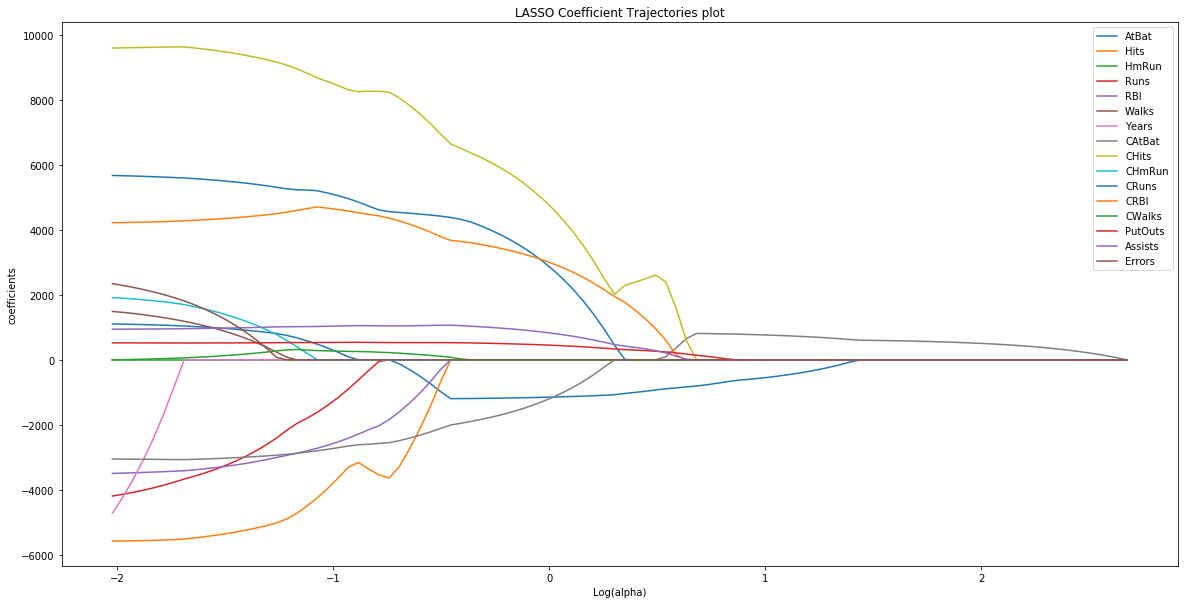

In [9]:
import warnings
warnings.filterwarnings("ignore")
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
plt.figure(figsize=(20,10))
eps = 2e-5
alphas_lasso, coefs_lasso, _ = lasso_path(norm_X, Y, eps, fit_intercept=False)
neg_log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(neg_log_alphas_lasso, coef_l)
plt.title('LASSO Coefficient Trajectories plot')
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.legend((X.columns),loc='upper right')
plt.show()

From above plot, we observe that the final three predictors remain in the model are:  *CAtBat,PutOuts and CRuns*

#### Cross-Validation

In [10]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=10, random_state=0).fit(norm_X, Y)
lassocv_score = reg.score(norm_X, Y)
lassocv_alpha = reg.alpha_
print('The optimal regularization penality is:', lassocv_alpha)
print('The remaining parameters in the optimal model are:', list(X.columns[abs(reg.coef_)>0]))
print('CV coefficients : ', reg.coef_)

The optimal regularization penality is: 0.1371821429861081
The remaining parameters in the optimal model are: ['Hits', 'Runs', 'RBI', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists']
CV coefficients :  [   -0.         -3444.65714893    -0.          -402.98421592
 -2375.14007167     0.            -0.         -2816.44983573
  8134.59612707     0.          4660.10589116  4447.07901303
   192.86762676   388.22612943   936.132407       0.        ]


From cross-validation, we find the best regularization penality is 540, and the remaining predictors in the models are: 'Hits', 'Runs', 'RBI', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists'

## Problem 1.2 : Ridge Regression

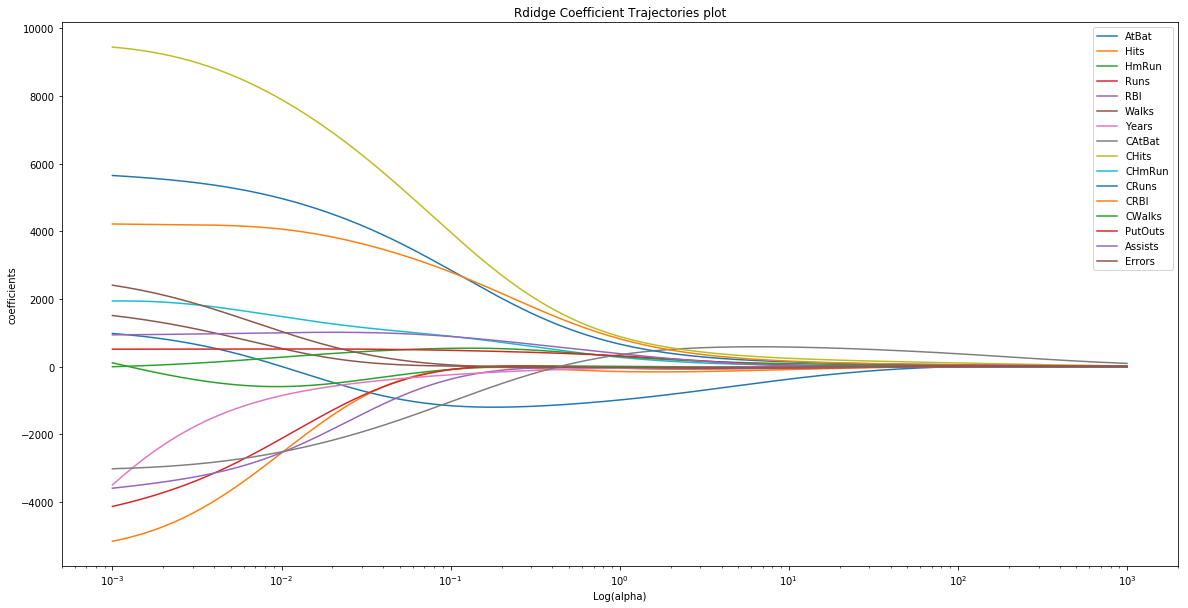

In [21]:
from sklearn import linear_model
n_alphas = 1000
alphas = np.logspace(-3, 3, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(norm_X, Y)
    coefs.append(ridge.coef_)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.title('Rdidge Coefficient Trajectories plot')
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.legend((X.columns),loc='upper right')

In [23]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(cv=5).fit(norm_X, Y)
ridgecv_score = reg.score(norm_X, Y)
ridgecv_alpha = reg.alpha_
print('The optimal regularization penality is:', ridgecv_alpha)
print('CV coefficients : ', reg.coef_)

The optimal regularization penality is: 0.1
CV coefficients :  [-1.30057930e+03 -8.05492378e+01 -9.74956103e+01 -7.23779966e+01
 -4.05561139e+02  3.20301985e+00 -2.45126348e+02 -1.56941450e+03
  3.68893222e+03  8.54939163e+02  2.67465683e+03  2.62150219e+03
  4.31279890e+02  1.31136806e+02  6.45834511e+02  8.05978551e+00]


## Problem 2: Bias-Variance Tradeoff

Bias-Variance tradeoff can also be described as the problem of over-fitting and under-fitting. Bias often refer as how good the model fits the training data, and variance can be treated as how good the model is in fitting new data(test data) or how good the the model can be genenalized on new data. Generally spearking, the more complex(flexible) the model is, the higher chance that the training yields a high-variance low bias model. Conversely, the less flexible the model is, the higher chance to yield high-bias low variance model.  

  
Regularization is an effective method in finding a balance in the bias-variance tradeoff by adjusting the model flexibility through the regularization penalty. With a large penalty parameter,  models become less flexible and incur high bias. With a small penatly parameter, the model remain flexible, but may have a tendecy to overfit.  

In this case, refer to the LASSO trajetory plot, the lower the alpha value, the larger the absolute value of the coefficients, and the more flexible the model becomes, which may yeilds an overfitted model. on the contary, the lower the alpha, more paramater coefficients shrink to zero, which reduce the model flexibility and thus variance. To the extreme case, all paramaters shrink to zero coefficient, which means the model will learn nothing from training data. 